In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import sklearn
import seaborn as sns
import sklearn.metrics as metrics

from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from keras.utils.vis_utils import plot_model

In [2]:
# path_test="/content/drive/MyDrive/Colab Notebooks/test"
path_train="/content/drive/MyDrive/Colab Notebooks/test"

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    path_train,
    validation_split=0.2,
    image_size=(128,128),
    batch_size=32,
    subset='training',
    seed=1000)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    path_train,
    validation_split=0.2,
    image_size=(128,128),
    batch_size=8,
    subset='validation',
    seed=1000
    )

Found 3911 files belonging to 2 classes.
Using 3129 files for training.
Found 3911 files belonging to 2 classes.
Using 782 files for validation.


In [3]:
train_data = train_data.map(lambda x, y: (tf.divide(x, 255), y))
val_data = val_data.map(lambda x, y: (tf.divide(x, 255), y))

class_name=["classic", "rotated"]

In [4]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(16,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       18560     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [5]:
cnn.compile(optimizer = 'adam' , loss = "poisson", metrics=["accuracy"])

In [6]:
early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                         mode ="min", patience = 5)

In [7]:
history = cnn.fit(train_data, validation_data = val_data, epochs = 30,callbacks = [early_stopping])

Epoch 1/30
98/98 [==============================] - 804s 8s/step - loss: 0.6368 - accuracy: 0.8591 - val_loss: 0.4906 - val_accuracy: 0.9974
Epoch 2/30
98/98 [==============================] - 58s 591ms/step - loss: 0.5108 - accuracy: 0.9958 - val_loss: 0.4857 - val_accuracy: 0.9987
Epoch 3/30
98/98 [==============================] - 59s 597ms/step - loss: 0.5083 - accuracy: 0.9965 - val_loss: 0.4856 - val_accuracy: 0.9987
Epoch 4/30
98/98 [==============================] - 59s 595ms/step - loss: 0.5056 - accuracy: 0.9978 - val_loss: 0.4855 - val_accuracy: 0.9987
Epoch 5/30
98/98 [==============================] - 58s 586ms/step - loss: 0.5053 - accuracy: 0.9984 - val_loss: 0.4856 - val_accuracy: 0.9987
Epoch 6/30
98/98 [==============================] - 57s 581ms/step - loss: 0.5053 - accuracy: 0.9974 - val_loss: 0.4855 - val_accuracy: 0.9987
Epoch 7/30
98/98 [==============================] - 58s 587ms/step - loss: 0.5050 - accuracy: 0.9984 - val_loss: 0.4855 - val_accuracy: 0.9987
E

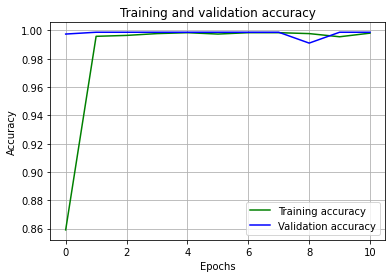

In [8]:

accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.grid(True)
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
cmap=metrics.confusion_matrix(val_data,train_data)
plt.figure(figsize=(4,4),dpi=150)
hm=sns.heatmap(data=cmap,annot=True,fmt='g')

ValueError: ignored